# Pandas
### Alberto Torres Barrán

Pandas es una librería de código abierto que implementa estructuras y herramientas para el análisis de datos en Python. Más concretamente, las dos estructuras principales son:
  * `Series`, para representar un vector de datos con un índice (no necesariamente numérico) asociado
  * `DataFrame`, para representar datos tabulares, donde las columnas pueden ser de distinto tipo y tienen asociado otro índice

Referencia: http://pandas.pydata.org/    
Tutoriales: https://pandas.pydata.org/pandas-docs/stable/tutorials.html    
Documentación: https://pandas.pydata.org/pandas-docs/stable/index.html

In [1]:
import numpy as np
import pandas as pd

# las Series contienen un array de Numpy con un índice asociado
serie = pd.Series([1, 2, 3, 4, 5])
serie

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [2]:
# podemos acceder al array de Numpy que contiene los datos
serie.values

array([1, 2, 3, 4, 5])

In [3]:
# y al indice
serie.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
# podemos acceder a ciertos valores de la Serie como si fuera un array de Numpy de 1D
serie[2:4]

2    3
3    4
dtype: int64

In [5]:
# la gran ventaja es que el indice no tiene por que ser numerico, pueden ser fechas...
rango = pd.date_range('1/7/2017', periods=24, freq='H')
ts = pd.Series(np.random.randn(len(rango)), index=rango)
ts

2017-01-07 00:00:00    0.191387
2017-01-07 01:00:00    1.088600
2017-01-07 02:00:00   -0.019781
2017-01-07 03:00:00   -0.911980
2017-01-07 04:00:00    1.411406
2017-01-07 05:00:00   -2.168532
2017-01-07 06:00:00    0.976912
2017-01-07 07:00:00   -0.534356
2017-01-07 08:00:00   -1.571056
2017-01-07 09:00:00   -0.632517
2017-01-07 10:00:00   -0.499543
2017-01-07 11:00:00    0.061092
2017-01-07 12:00:00    0.736884
2017-01-07 13:00:00   -0.189524
2017-01-07 14:00:00   -0.377928
2017-01-07 15:00:00    0.588379
2017-01-07 16:00:00   -1.097793
2017-01-07 17:00:00    0.041253
2017-01-07 18:00:00    1.211991
2017-01-07 19:00:00   -0.141979
2017-01-07 20:00:00    0.456011
2017-01-07 21:00:00   -2.066667
2017-01-07 22:00:00   -0.731310
2017-01-07 23:00:00    0.452978
Freq: H, dtype: float64

In [6]:
# o cadenas de caracteres
notas = pd.Series([4.5, 9.8, 6.5], index=['Alberto', 'Maria', 'Jose'])
notas

Alberto    4.5
Maria      9.8
Jose       6.5
dtype: float64

In [7]:
notas['Maria']

9.8

In [8]:
# en este caso, es similar a un diccionario pero sus elementos estan ordenados
notas['Alberto':'Maria']

Alberto    4.5
Maria      9.8
dtype: float64

Los `DataFrames` almacenan datos tabulares y se pueden interpretar de dos formas:
 * Como un array de Numpy en 2D donde cada columna puede ser de un tipo distinto y tiene un nombre
 * Como un conjunto de `Series` que comparten un índice

In [9]:
import pandas as pd
fechas = pd.date_range('20170101', periods=6)
fechas

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')

In [123]:
# se puede crear un DataFrame a partir de un array de Numpy, indicando el indice a usar (fechas en este caso)
# y el nombre de las columnas
# ['A', 'B', 'C', 'D']
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(6,4), index=fechas, columns=list('ABCD'))
df

,A,B,C,D
2017-01-01,0.248629,-0.202076,1.527722,-0.250054
2017-01-02,-0.089443,0.544602,0.337311,-0.575511
2017-01-03,0.470453,-0.541968,0.002309,-1.529380
2017-01-04,0.468811,-1.112179,-0.130189,-0.896953
2017-01-05,-0.066059,0.667104,-0.621184,0.052273
2017-01-06,-0.076081,-0.046717,-0.490924,0.716141


In [11]:
# tambien se puede crear un DataFrame a partir de un diccionario con objetos que se pueden convertir en Series
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1, index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
# tipos de cada una de las columnas
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [13]:
# nombres de las columnas
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [14]:
# podemos acceder a cada una de las columnas por su nombre, devolviendo una Serie
df['A']

2017-01-01    0.907015
2017-01-02    1.281871
2017-01-03    0.241259
2017-01-04   -0.345477
2017-01-05    0.772033
2017-01-06    1.336222
Freq: D, Name: A, dtype: float64

In [15]:
# tambien a varias, obteniendo otro DataFrame
df[ ['A', 'D'] ]

,A,D
2017-01-01,0.907015,1.314934
2017-01-02,1.281871,0.068638
2017-01-03,0.241259,0.794694
2017-01-04,-0.345477,0.539440
2017-01-05,0.772033,1.068202
2017-01-06,1.336222,0.157820


In [16]:
# tambien podemos acceder a un subconjunto de las filas
df[1:4]

,A,B,C,D
2017-01-02,1.281871,0.507760,1.566460,0.068638
2017-01-03,0.241259,-0.044062,1.360712,0.794694
2017-01-04,-0.345477,0.164809,1.319772,0.539440


In [17]:
# y combinar ambas cosas
df['A'][1:4]

2017-01-02    1.281871
2017-01-03    0.241259
2017-01-04   -0.345477
Freq: D, Name: A, dtype: float64

Pandas también tiene otros métodos de acceso más avanzados:
  * *Indexing and Selecting Data* http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing    
  * *Multiindexing/Advanced indexing* http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced

##### Selección por etiquetas

Método `.loc`. Algunos ejemplos:

In [18]:
# en este caso, los puntos finales SI se incluyen
df.loc['20170102':'20170104', ['A','B']]

,A,B
2017-01-02,1.281871,0.507760
2017-01-03,0.241259,-0.044062
2017-01-04,-0.345477,0.164809


In [19]:
df.loc['20170103']

A    0.241259
B   -0.044062
C    1.360712
D    0.794694
Name: 2017-01-03 00:00:00, dtype: float64

###### Selección por posición

Método `.iloc`. Muy parecido a como lo hace Numpy. Algunos ejemplos:

In [20]:
# cuarta fila
df.iloc[3]

A   -0.345477
B    0.164809
C    1.319772
D    0.539440
Name: 2017-01-04 00:00:00, dtype: float64

In [21]:
print((df.iloc[3:5,0:2]))
df.values[3:5, 0:2]

                   A         B
2017-01-04 -0.345477  0.164809
2017-01-05  0.772033 -0.024435


array([[-0.34547746,  0.16480943],
       [ 0.7720332 , -0.02443538]])

In [22]:
df.iloc[[1,2,4],[0,2]]

,A,C
2017-01-02,1.281871,1.566460
2017-01-03,0.241259,1.360712
2017-01-05,0.772033,0.709798


##### Operaciones

Funcionalidad básica: https://pandas.pydata.org/pandas-docs/stable/basics.html

In [23]:
# al añadir una nueva columna, esta se alinea con el indice
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20170102', periods=6))
print(s1)
df['F'] = s1
df

2017-01-02    1
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
2017-01-07    6
Freq: D, dtype: int64


,A,B,C,D,F
2017-01-01,0.907015,0.230659,-0.114304,1.314934,NaN
2017-01-02,1.281871,0.507760,1.566460,0.068638,1.0
2017-01-03,0.241259,-0.044062,1.360712,0.794694,2.0
2017-01-04,-0.345477,0.164809,1.319772,0.539440,3.0
2017-01-05,0.772033,-0.024435,0.709798,1.068202,4.0
2017-01-06,1.336222,-0.387960,1.360179,0.157820,5.0


In [24]:
# Pandas utiliza np.nan para representar valores que faltan. Por defecto no se incluye en los calculos
# Eliminar las filas que tienen algun valor que falta
df.dropna(how='any')

,A,B,C,D,F
2017-01-02,1.281871,0.507760,1.566460,0.068638,1.0
2017-01-03,0.241259,-0.044062,1.360712,0.794694,2.0
2017-01-04,-0.345477,0.164809,1.319772,0.539440,3.0
2017-01-05,0.772033,-0.024435,0.709798,1.068202,4.0
2017-01-06,1.336222,-0.387960,1.360179,0.157820,5.0


In [25]:
# eliminar una fila o columna por su etiqueta
df.drop(columns='B')

,A,C,D,F
2017-01-01,0.907015,-0.114304,1.314934,NaN
2017-01-02,1.281871,1.566460,0.068638,1.0
2017-01-03,0.241259,1.360712,0.794694,2.0
2017-01-04,-0.345477,1.319772,0.539440,3.0
2017-01-05,0.772033,0.709798,1.068202,4.0
2017-01-06,1.336222,1.360179,0.157820,5.0


In [26]:
df.fillna(value=df['F'].mean())

,A,B,C,D,F
2017-01-01,0.907015,0.230659,-0.114304,1.314934,3.0
2017-01-02,1.281871,0.507760,1.566460,0.068638,1.0
2017-01-03,0.241259,-0.044062,1.360712,0.794694,2.0
2017-01-04,-0.345477,0.164809,1.319772,0.539440,3.0
2017-01-05,0.772033,-0.024435,0.709798,1.068202,4.0
2017-01-06,1.336222,-0.387960,1.360179,0.157820,5.0


In [27]:
# rellenar los valores que faltan
df.fillna(value=0)

,A,B,C,D,F
2017-01-01,0.907015,0.230659,-0.114304,1.314934,0.0
2017-01-02,1.281871,0.507760,1.566460,0.068638,1.0
2017-01-03,0.241259,-0.044062,1.360712,0.794694,2.0
2017-01-04,-0.345477,0.164809,1.319772,0.539440,3.0
2017-01-05,0.772033,-0.024435,0.709798,1.068202,4.0
2017-01-06,1.336222,-0.387960,1.360179,0.157820,5.0


In [28]:
# al igual que numpy, pandas tambien tiene implementadas funciones de estadistica descriptiva
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,0.698820,0.074462,1.033769,0.657288,3.000000
std,0.647280,0.302645,0.632775,0.496003,1.581139
min,-0.345477,-0.387960,-0.114304,0.068638,1.000000
25%,0.373953,-0.039155,0.862291,0.253225,2.000000
50%,0.839524,0.070187,1.339975,0.667067,3.000000
75%,1.188157,0.214196,1.360579,0.999825,4.000000
max,1.336222,0.507760,1.566460,1.314934,5.000000


In [29]:
# por columnas (axis = 0)
df.mean()

A    0.698820
B    0.074462
C    1.033769
D    0.657288
F    3.000000
dtype: float64

In [30]:
# por filas (axis = 1)
df.mean(axis=1)

2017-01-01    0.584576
2017-01-02    0.884946
2017-01-03    0.870521
2017-01-04    0.935709
2017-01-05    1.305119
2017-01-06    1.493252
Freq: D, dtype: float64

Existen también métodos para el resto de funciones estadísticas como la varianza, mediana, percentiles, etc. La lista completa se puede ver en la documentación: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [31]:
# cuando hacemos una operacion aritmetica entre dos series, primero se alinean los indices de las filas
import pandas as pd
s1 = pd.Series([1,2,3,4,5], index=pd.date_range('20170101', periods=5))
s2 = pd.Series([1,2,3,4,5], index=pd.date_range('20170102', periods=5))

print(s1 + s2)
s1.add(s2, fill_value=0)

2017-01-01    NaN
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
2017-01-06    NaN
Freq: D, dtype: float64


2017-01-01    1.0
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
2017-01-06    5.0
Freq: D, dtype: float64

In [32]:
# cuando hacemos una operacion aritmetica entre dos series, primero se alinean los indices de las filas
import pandas as pd
s1 = pd.Series([1,2,3,4,5], index=pd.date_range('20170101', periods=5))
s2 = pd.Series([1,2,3,4], index=pd.date_range('20170102', periods=4))

print(s1 + s2)
s1.add(s2, fill_value=0)

2017-01-01    NaN
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
Freq: D, dtype: float64


2017-01-01    1.0
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
Freq: D, dtype: float64

In [33]:
# lo mismo pasa con los DataFrames pero se alinean por filas y columnas
df1 = df[['B', 'C']][2:5]
print(df)
print(df1)
df + df1
df.add(df1)

                   A         B         C         D    F
2017-01-01  0.907015  0.230659 -0.114304  1.314934  NaN
2017-01-02  1.281871  0.507760  1.566460  0.068638  1.0
2017-01-03  0.241259 -0.044062  1.360712  0.794694  2.0
2017-01-04 -0.345477  0.164809  1.319772  0.539440  3.0
2017-01-05  0.772033 -0.024435  0.709798  1.068202  4.0
2017-01-06  1.336222 -0.387960  1.360179  0.157820  5.0
                   B         C
2017-01-03 -0.044062  1.360712
2017-01-04  0.164809  1.319772
2017-01-05 -0.024435  0.709798


,A,B,C,D,F
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,-0.088123,2.721424,NaN,NaN
2017-01-04,NaN,0.329619,2.639543,NaN,NaN
2017-01-05,NaN,-0.048871,1.419596,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN


In [34]:
# si operamos con una Serie y un DataFrame, los indices de la serie tienen que coincidir o bien con los 
# indices del DataFrame o bien con sus columnas
s1

2017-01-01    1
2017-01-02    2
2017-01-03    3
2017-01-04    4
2017-01-05    5
Freq: D, dtype: int64

In [35]:
df

,A,B,C,D,F
2017-01-01,0.907015,0.230659,-0.114304,1.314934,NaN
2017-01-02,1.281871,0.507760,1.566460,0.068638,1.0
2017-01-03,0.241259,-0.044062,1.360712,0.794694,2.0
2017-01-04,-0.345477,0.164809,1.319772,0.539440,3.0
2017-01-05,0.772033,-0.024435,0.709798,1.068202,4.0
2017-01-06,1.336222,-0.387960,1.360179,0.157820,5.0


In [36]:
df.add(s1, axis=0)

,A,B,C,D,F
2017-01-01,1.907015,1.230659,0.885696,2.314934,NaN
2017-01-02,3.281871,2.507760,3.566460,2.068638,3.0
2017-01-03,3.241259,2.955938,4.360712,3.794694,5.0
2017-01-04,3.654523,4.164809,5.319772,4.539440,7.0
2017-01-05,5.772033,4.975565,5.709798,6.068202,9.0
2017-01-06,NaN,NaN,NaN,NaN,NaN


In [37]:
s2 = pd.Series([1, 2, 3, 4, 5], list('ABCDF'))
print(df)
df.add(s2, axis=1)

                   A         B         C         D    F
2017-01-01  0.907015  0.230659 -0.114304  1.314934  NaN
2017-01-02  1.281871  0.507760  1.566460  0.068638  1.0
2017-01-03  0.241259 -0.044062  1.360712  0.794694  2.0
2017-01-04 -0.345477  0.164809  1.319772  0.539440  3.0
2017-01-05  0.772033 -0.024435  0.709798  1.068202  4.0
2017-01-06  1.336222 -0.387960  1.360179  0.157820  5.0


,A,B,C,D,F
2017-01-01,1.907015,2.230659,2.885696,5.314934,NaN
2017-01-02,2.281871,2.507760,4.566460,4.068638,6.0
2017-01-03,1.241259,1.955938,4.360712,4.794694,7.0
2017-01-04,0.654523,2.164809,4.319772,4.539440,8.0
2017-01-05,1.772033,1.975565,3.709798,5.068202,9.0
2017-01-06,2.336222,1.612040,4.360179,4.157820,10.0


Existen también métodos `.mult()`, `.div()` y `.sub()` para multiplicar, dividir y restar `DataFrames` y `Series`. Los operadores aritméticos también funcionan pero son menos flexibles (no se puede especificar el eje).

##### Lectura de ficheros

Al igual que Numpy, Pandas proporciona funciones para importar datos desde diversas fuentes a un `DataFrame`. La funciones principales son `read_csv()` y `read_table()`.

Lista completa: http://pandas.pydata.org/pandas-docs/version/0.20/io.html

Datos del número de bicicletas en la ciudad de Montreal

Fuente: http://donnees.ville.montreal.qc.ca/dataset/velos-comptage

In [ ]:
import pandas as pd
bikes = pd.read_csv('../data/bikes2016.csv', index_col='Date', parse_dates=['Date'], dayfirst=True)
bikes[:3]

In [ ]:
bikes.drop(columns=['Timestamp'])

#### Trabajando con texto y fechas

Los objetos de tipo Series y los de tipo Index contienen métodos para procesar de forma vectorial datos de tipo `str`. La mayoría tiene la misma funcionalidad que en el caso de las cadenas de caracteres de Python pero realizan la operación de forma vectorizada para todos los elementos de la serie.

Referencia: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods    
Lista completa: http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary

Pandas también proporciona mucha funcionalidad para trabajar con fechas, crear rangos, modificar la frecuencia, etc.

Referencia: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components    
Lista de componentes de una fecha: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components

In [81]:
weather = pd.read_csv('../data/weather_2012.csv', parse_dates=[0])
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [63]:
weather.dtypes

Date/Time             datetime64[ns]
Temp (C)                     float64
Dew Point Temp (C)           float64
Rel Hum (%)                    int64
Wind Spd (km/h)                int64
Visibility (km)              float64
Stn Press (kPa)              float64
Weather                       object
dtype: object

In [66]:
weather['Weather'].str.split(",", expand = True)

,0,1,2
0,Fog,None,None
1,Fog,None,None
2,Freezing Drizzle,Fog,None
3,Freezing Drizzle,Fog,None
4,Fog,None,None
...,...,...,...
8779,Snow,None,None
8780,Snow,None,None
8781,Snow,None,None
8782,Snow,None,None


In [67]:
weather.describe(include="all")

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,2012-01-03 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
first,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN


In [49]:
weather['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [68]:
nieve = weather['Weather'].str.contains('Snow')

In [70]:
nieve.sum()

583

In [51]:
weather.loc[nieve, 'Weather'].value_counts()

Snow                          390
Snow Showers                   60
Snow,Fog                       37
Snow,Blowing Snow              19
Rain,Snow                      18
Drizzle,Snow,Fog               15
Freezing Drizzle,Snow          11
Snow,Ice Pellets                6
Snow,Haze                       5
Rain,Snow,Ice Pellets           4
Snow Showers,Fog                4
Moderate Snow                   4
Drizzle,Snow                    2
Rain Showers,Snow Showers       2
Moderate Snow,Blowing Snow      2
Snow Pellets                    1
Rain,Snow Grains                1
Freezing Rain,Snow Grains       1
Rain,Snow,Fog                   1
Name: Weather, dtype: int64

In [73]:
weather['Date/Time'].dt.hour.value_counts()

23    366
15    366
8     366
16    366
1     366
9     366
17    366
2     366
10    366
18    366
3     366
11    366
19    366
4     366
12    366
20    366
5     366
13    366
21    366
6     366
14    366
22    366
7     366
0     366
Name: Date/Time, dtype: int64

In [75]:
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [82]:
weather.set_index('Date/Time', inplace=True)

In [85]:
weather.reset_index()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [88]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [89]:
tmp = weather['Temp (C)'].resample('M').median()
tmp

Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
2012-06-30    19.60
2012-07-31    22.90
2012-08-31    22.20
2012-09-30    16.10
2012-10-31    11.30
2012-11-30     1.05
2012-12-31    -2.85
Freq: M, Name: Temp (C), dtype: float64

#### Ejercicio titanic

##### Visualización

Los objetos de tipo `DataFrame` tiene un método `.plot()` que hace muy sencillo representar gráficamente sus contenidos. Por defecto hace una gráfica con todas las columnas que tienen etiqueta del `DataFrame`.

Más información: https://pandas.pydata.org/pandas-docs/stable/visualization.html

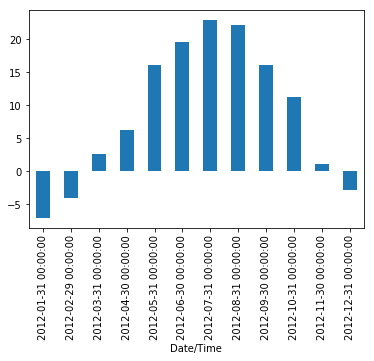

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

tmp.plot(kind='bar')

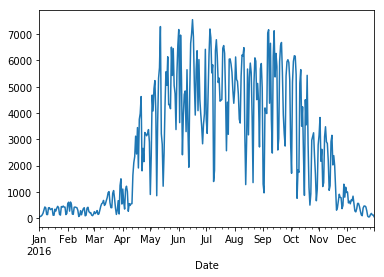

In [56]:
bikes['Berri1'].plot()

In [100]:
bikes.sum()

Berri1                          988595.0
Boyer                           737419.0
Brébeuf                         896210.0
CSC (Côte Sainte-Catherine)     465906.0
Maisonneuve_2                  1173342.0
Maisonneuve_3                   365220.0
Notre-Dame                      380477.0
Parc                            627132.0
PierDup                         367346.0
Pont_Jacques_Cartier            494156.0
Rachel / Hôtel de Ville         515635.0
Rachel / Papineau               810789.0
René-Lévesque                   505378.0
Saint-Antoine                   119318.0
Saint-Urbain                    378158.0
Totem_Laurier                   759342.0
University                      660420.0
Viger                           101807.0
Month                             2384.0
dtype: float64

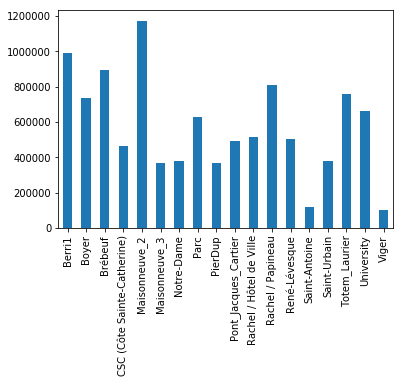

In [57]:
bikes.sum().plot(kind='bar')

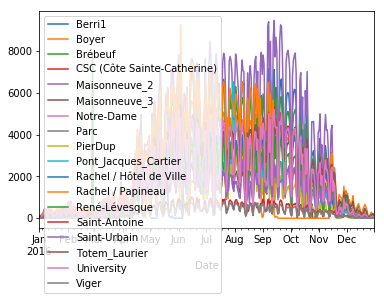

In [58]:
bikes.plot()

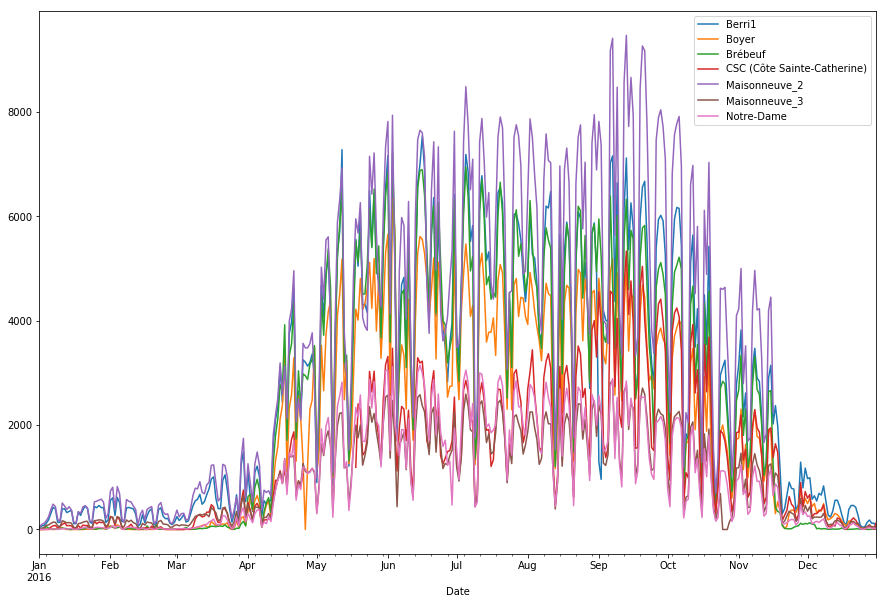

In [59]:
bikes.iloc[:, :7].plot(figsize=(15, 10))

Datos con las llamadas al 311 en la ciudad de Nueva York durante el 2011

Fuente: https://data.cityofnewyork.us/dataset/311-Service-Requests-From-2011/fpz8-jqf4

In [99]:
data = pd.read_csv('../data/NYC--377-SR-CB03-4714.csv')
data

/home/alberto/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,29,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45486238,01/27/2020 09:36:00 AM,NaN,DEP,Department of Environmental Protection,Water Quality,"Taste/Odor, Chlorine (QA1)",NaN,10003.0,335 EAST 5 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726392,-73.988043,"(40.72639211582395, -73.98804348469741)"
1,45486354,01/27/2020 08:19:08 PM,01/27/2020 11:17:00 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,10009.0,400 EAST 12 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729971,-73.983471,"(40.72997071226904, -73.98347141273716)"
2,45488038,01/27/2020 02:43:15 PM,01/27/2020 06:44:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10003.0,47 SECOND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725399,-73.990010,"(40.72539870121316, -73.99000992838972)"
3,45483549,01/27/2020 10:50:00 PM,NaN,DOE,Department of Education,School Maintenance,Unclean Condition,NaN,10002.0,293 EAST BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714570,-73.983724,"(40.71456990934003, -73.98372413141455)"
4,45486665,01/27/2020 10:52:53 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10002.0,157 BROOME STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.716607,-73.985271,"(40.716606730161864, -73.98527118746058)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255805,44063203,10/15/2019 03:29:09 AM,10/15/2019 05:54:28 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10002.0,32 HENRY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712880,-73.996050,"(40.71288021907557, -73.99605017193778)"
255806,44063314,10/15/2019 07:09:30 PM,10/16/2019 03:34:11 PM,TLC,Taxi and Limousine Commission,Lost Property,Bag/Wallet,NaN,10002.0,205 EAST HOUSTON STREET,...,NaN,NaN,"205 EAST HOUSTON STREET, MANHATTAN (NEW YORK),...",NaN,NaN,NaN,NaN,40.722511,-73.987301,"(40.72251094922887, -73.98730100093874)"
255807,44063720,10/15/2019 01:21:38 PM,10/15/2019 07:45:07 PM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,10002.0,106 MADISON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712219,-73.995267,"(40.71221870195438, -73.99526746759064)"
255808,44063737,10/15/2019 11:29:01 AM,10/15/2019 09:19:45 PM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10009.0,143 AVENUE D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724749,-73.975269,"(40.72474871581904, -73.97526859020363)"


In [101]:
data['Complaint Type'].unique().size

213

In [102]:
count = data['Complaint Type'].value_counts()
count

Noise - Residential          35527
HEAT/HOT WATER               21044
Noise - Commercial           19647
Noise                        13138
Illegal Parking              11956
                             ...  
Pet Shop                         1
Single Occupancy Bathroom        1
Building Condition               1
Calorie Labeling                 1
Lifeguard                        1
Name: Complaint Type, Length: 213, dtype: int64

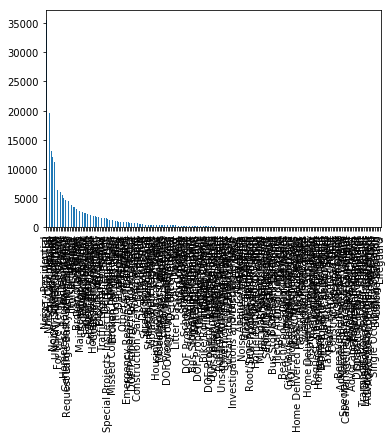

In [103]:
count.plot(kind='bar')

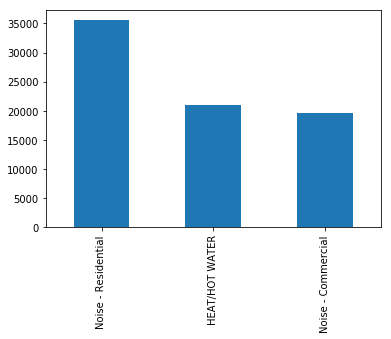

In [104]:
count[count > 15000].plot(kind='bar')

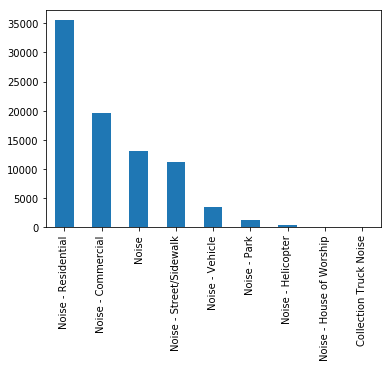

In [108]:
count[ count.index.str.contains("Noise") ].plot(kind="bar")

##### Ejercicio weather y nycity

##### Group by: split-apply-combine

Muchas veces las operaciones no las queremos hacer sobre una variable sino agrupandola en función de otra. Pandas implementa esta funcionalidad en los métodos `.groupby()`, `.transform()` y `.aggregate()`.

Más información: https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [90]:
bikes['Month'] = bikes.index.month
bikes['Trimestre'] = pd.cut(bikes['Month'], [1, 3, 6, 9, 12], include_lowest=True)
bikes.groupby('Trimestre')['University'].mean()

Trimestre
(0.999, 3.0]     258.373626
(3.0, 6.0]      2466.109890
(6.0, 9.0]      3293.293478
(9.0, 12.0]     1190.315217
Name: University, dtype: float64

In [97]:
import numpy as np
res = bikes.groupby('Month').agg([np.sum, np.mean])
res

Berri1                Boyer              Brébeuf               \
          sum         mean     sum         mean     sum         mean   
Month                                                                  
1        8503   274.290323     244     7.870968     473    15.258065   
2        8432   290.758621     348    12.000000     624    21.517241   
3       17294   557.870968    2069    66.741935    1164    37.548387   
4       62759  2091.966667   42450  1415.000000   59473  1982.433333   
5      136001  4387.129032  112103  3616.225806  136906  4416.322581   
6      145972  4865.733333  121958  4065.266667  144407  4813.566667   
7      156673  5053.967742  123951  3998.419355  151517  4887.645161   
8      146558  4727.677419  119706  3861.483871  143398  4625.741935   
9      145296  4843.200000  113692  3789.733333  136479  4549.300000   
10      96285  3105.967742   64263  2073.000000   84387  2722.161290   
11      52637  1754.566667   30053  1001.766667   36713  1223.766667   
12      12185   393.064516    6582   212.322581     669    21.580645   

      CSC (Côte Sainte-Catherine)              Maisonneuve_2               \
                              sum         mean           sum         mean   
Month                                                                       
1                          1955.0    63.064516       10244.0   330.451613   
2                          1618.0    55.793103       11079.0   382.034483   
3                          6450.0   208.064516       21983.0   709.129032   
4                         18297.0   731.880000       67934.0  2264.466667   
5                         30060.0  2147.142857      146900.0  4738.709677   
6                         63753.0  2125.100000      163284.0  5442.800000   
7                         61741.0  1991.645161      183623.0  5923.322581   
8                         77663.0  2505.258065      182923.0  5900.741935   
9                        101796.0  3393.200000      202139.0  6737.966667   
10                        64486.0  2080.193548      128940.0  4159.354839   
11                        32725.0  1090.833333       54293.0  3393.312500   
12                         5362.0   172.967742           0.0          NaN   

       ... Saint-Antoine             Saint-Urbain              Totem_Laurier  \
       ...           sum        mean          sum         mean           sum   
Month  ...                                                                     
1      ...          1084   34.967742         2555    82.419355          5817   
2      ...          1296   44.689655         2573    88.724138          3803   
3      ...          1839   59.322581         8916   287.612903         11238   
4      ...          6955  231.833333        29079   969.300000         48890   
5      ...         16256  524.387097        52932  1707.483871         98680   
6      ...         18441  614.700000        56848  1894.933333        110439   
7      ...         19823  639.451613        52653  1698.483871        112032   
8      ...         17687  570.548387        51068  1647.354839        112876   
9      ...         17765  592.166667        55635  1854.500000        115794   
10     ...         10596  341.806452        39899  1287.064516         78427   
11     ...          6031  201.033333        22592   753.066667         49386   
12     ...          1545   49.838710         3408   109.935484         11960   

                   University               Viger              
              mean        sum         mean    sum        mean  
Month                                                          
1       187.645161       6012   193.935484   1258   40.580645  
2       131.137931       5490   189.310345   1246   42.965517  
3       362.516129      12010   387.419355   1807   58.290323  
4      1629.666667      41917  1397.233333   6105  203.500000  
5      3183.225806      86415  2787.580645  13288  428.645161  
6      3681.300000      96084  3202.800000  14966  498.86

In [98]:
res.loc[:, ("Berri1", "sum")]

Month
1       8503
2       8432
3      17294
4      62759
5     136001
6     145972
7     156673
8     146558
9     145296
10     96285
11     52637
12     12185
Name: (Berri1, sum), dtype: int64

In [95]:
bikes.reset_index().groupby('Month').agg({'Berri1': [np.mean, np.sum], 'Boyer': np.sum})

Berri1           Boyer
              mean     sum     sum
Month                             
1       274.290323    8503     244
2       290.758621    8432     348
3       557.870968   17294    2069
4      2091.966667   62759   42450
5      4387.129032  136001  112103
6      4865.733333  145972  121958
7      5053.967742  156673  123951
8      4727.677419  146558  119706
9      4843.200000  145296  113692
10     3105.967742   96285   64263
11     1754.566667   52637   30053
12      393.064516   12185    6582

In [120]:

df1 = bikes.groupby('Month').agg({'Berri1': np.mean, 'Boyer': np.sum})
df1 = bikes.groupby('Month').aggregate([np.sum, np.mean])
df1 = bikes.groupby(['Month'])[['Berri1', 'University']].sum()
df1

,Berri1,University
Month,,
1,8503,6012
2,8432,5490
3,17294,12010
4,62759,41917
5,136001,86415
6,145972,96084
7,156673,101593
8,146558,98018
9,145296,103372


In [ ]:
bikes['Month'] = bikes.index.month

In [ ]:
df1['Berri1'].plot(kind='bar');

###### Ejercicio bicis

##### Combinar Pandas y Matplotlib

El método `.plot()` de los `DataFrames` de Pandas es bastante flexible, pero no podemos modificar ningún aspecto del gráfico no contemplado en los parámetros opcionales:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

En ese caso, puesto que los gráficos de Pandas están construídos sobre la librería Matplotlib, podemos utilizar las funciones de bajo nivel de la misma para modificar cualquier aspecto de nuestro gráfico.

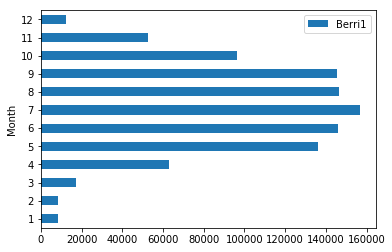

In [112]:
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)

Text(0, 0.5, 'Mes')

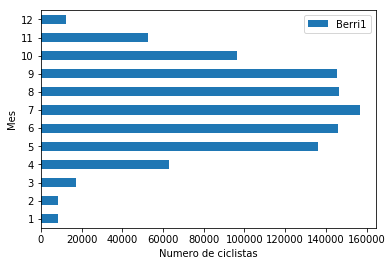

In [113]:
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')

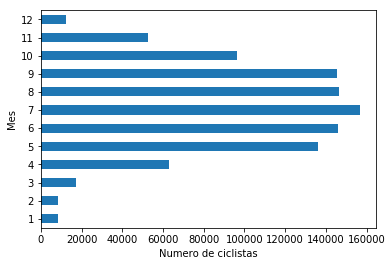

In [114]:
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')
ax.legend().set_visible(False)

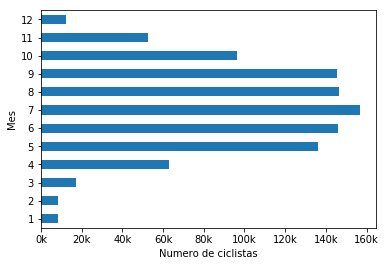

In [115]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))

ax.legend().set_visible(False)

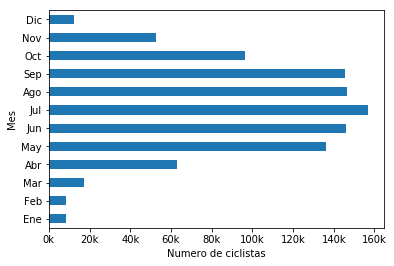

In [116]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))
ax.set_yticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
ax.legend().set_visible(False)

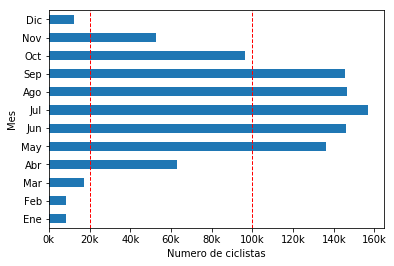

In [117]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))
ax.set_yticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
for x in (20000, 100000):
    ax.axvline(x=x, color='r', linestyle='--', linewidth=1)
ax.legend().set_visible(False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9125c17d10>,
      dtype=object)

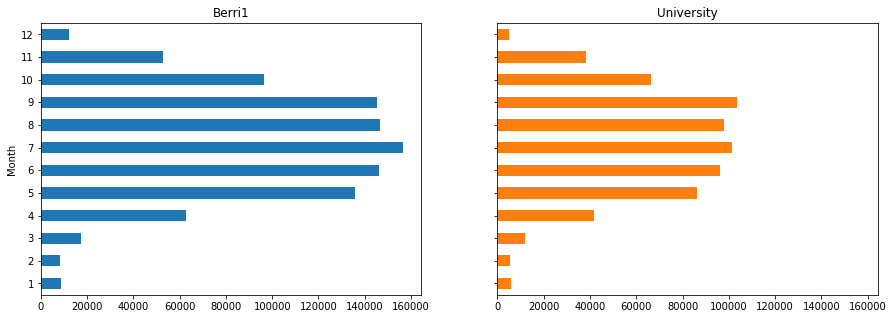

In [121]:
# solo con Pandas
df1[['Berri1', 'University']].plot(kind='barh', 
                                   sharey=True, 
                                   subplots=True, 
                                   legend=False, 
                                   layout=(1,2),
                                   figsize=(15, 5))

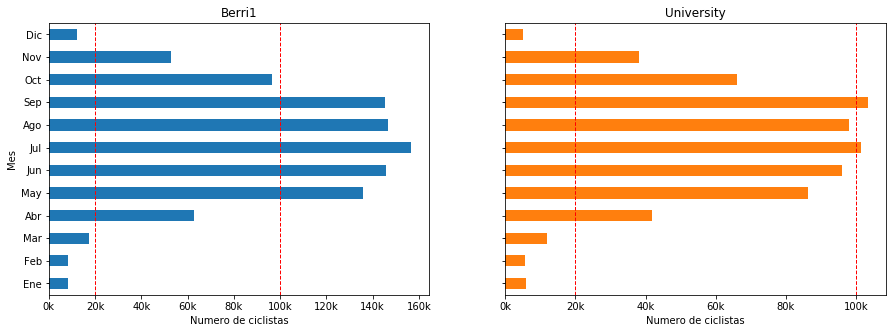

In [122]:
# Pandas + retocar en Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
df1[['Berri1', 'University']].plot(kind='barh',  
                                   subplots=True, 
                                   legend=False, 
                                   ax=axes)
for ax in axes:
    ax.set_xlabel('Numero de ciclistas')
    ax.set_ylabel('Mes')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))
    ax.set_yticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    for x in (20000, 100000):
        ax.axvline(x=x, color='r', linestyle='--', linewidth=1)

In [125]:
df.to_csv("numeros.csv")

In [126]:
df

,A,B,C,D
2017-01-01,0.248629,-0.202076,1.527722,-0.250054
2017-01-02,-0.089443,0.544602,0.337311,-0.575511
2017-01-03,0.470453,-0.541968,0.002309,-1.529380
2017-01-04,0.468811,-1.112179,-0.130189,-0.896953
2017-01-05,-0.066059,0.667104,-0.621184,0.052273
2017-01-06,-0.076081,-0.046717,-0.490924,0.716141
